In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [217]:
insurance = pd.read_csv("insurance.csv")
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552
5,-31.0,woman,25.740,0.0,no,southeast,$3756.6216
6,46.0,woman,33.440,1.0,no,southeast,8240.5896
7,37.0,female,27.740,3.0,no,Northwest,7281.5056
8,37.0,male,29.830,2.0,no,Northeast,$6406.4107
9,60.0,female,25.840,0.0,no,northwest,28923.13692


## Taks #1 : Clean up the data
### - Are the any missing valuer
### - standardize categories im region
### - Standardize changes data type (float)

# Implement model creation and training here
# Use as many cells as you need

In [218]:
insurance_filled = insurance.dropna()

In [219]:
insurance_filled["region"].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [220]:
insurance_filled["region"]=insurance_filled["region"].str.lower()

C:\Users\aditi\AppData\Local\Temp\ipykernel_15112\1641862387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled["region"]=insurance_filled["region"].str.lower()


In [221]:
insurance_filled["sex"].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [222]:
FEMALE = "female"
MALE = "male"
sex_map = {
    "F":FEMALE,
    "woman": FEMALE,
    "man":MALE,
    "M":MALE
}
insurance_filled["sex"] = insurance_filled["sex"].replace(sex_map)

C:\Users\aditi\AppData\Local\Temp\ipykernel_15112\3700467947.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled["sex"] = insurance_filled["sex"].replace(sex_map)


In [223]:
insurance_filled["sex"].unique()

array(['female', 'male'], dtype=object)

In [224]:
#making smoker value to be bool type
insurance_filled["smoker"] = (insurance_filled["smoker"]=="yes")


C:\Users\aditi\AppData\Local\Temp\ipykernel_15112\618189418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled["smoker"] = (insurance_filled["smoker"]=="yes")


In [225]:
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: bool(1), float64(3), object(3)
memory usage: 67.2+ KB


In [226]:
insurance_filled.sample(10)

,age,sex,bmi,children,smoker,region,charges
74,44.0,male,27.400,2.0,False,southwest,7726.854
124,47.0,female,33.915,3.0,False,northwest,10115.00885
304,57.0,female,38.000,2.0,False,southwest,12646.207
1215,18.0,male,39.140,0.0,False,northeast,12890.05765
1300,45.0,male,30.360,0.0,True,southeast,62592.87309
966,51.0,male,24.795,2.0,True,northwest,$23967.38305
318,44.0,female,27.645,0.0,False,northwest,7421.19455
1051,64.0,male,26.410,0.0,False,northeast,$14394.5579
873,43.0,male,30.100,1.0,False,southwest,6849.026
821,26.0,male,17.670,0.0,False,northwest,2680.9493


In [227]:
insurance_filled["charges"]= insurance_filled["charges"].str.strip("$").astype("float64")

C:\Users\aditi\AppData\Local\Temp\ipykernel_15112\1821629062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled["charges"]= insurance_filled["charges"].str.strip("$").astype("float64")


In [228]:
insurance_filled.sample(10)

,age,sex,bmi,children,smoker,region,charges
612,18.0,female,33.155,0.0,False,northeast,2207.69745
1085,39.0,female,18.300,5.0,True,southwest,19023.26000
1218,46.0,female,34.600,1.0,True,southwest,41661.60200
631,24.0,male,29.300,0.0,False,southwest,1977.81500
214,45.0,female,30.900,2.0,False,southwest,8520.02600
504,38.0,female,28.930,1.0,False,southeast,5974.38470
1251,-19.0,male,19.800,0.0,False,southwest,1241.56500
300,36.0,male,27.550,3.0,False,northeast,6746.74250
1069,54.0,female,31.900,1.0,False,southeast,10928.84900
825,64.0,female,31.825,2.0,False,northeast,16069.08475


In [229]:
insurance_pos = insurance_filled.apply(lambda x : x.abs() if np.issubdtype(x.dtype,np.number) else x)

In [230]:
insurance_pos.to_csv("cleaned insurance.csv", index = False)

# Task #2 : Scatterplots of relationship between

In [231]:
df = pd.read_csv("cleaned insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,True,southwest,16884.92400
1,18.0,male,33.770,1.0,False,southeast,1725.55230
2,28.0,male,33.000,3.0,False,southeast,4449.46200
3,33.0,male,22.705,0.0,False,northwest,21984.47061
4,32.0,male,28.880,0.0,False,northwest,3866.85520
...,...,...,...,...,...,...,...
1203,50.0,male,30.970,3.0,False,northwest,10600.54830
1204,18.0,female,31.920,0.0,False,northeast,2205.98080
1205,18.0,female,36.850,0.0,False,southeast,1629.83350
1206,21.0,female,25.800,0.0,False,southwest,2007.94500


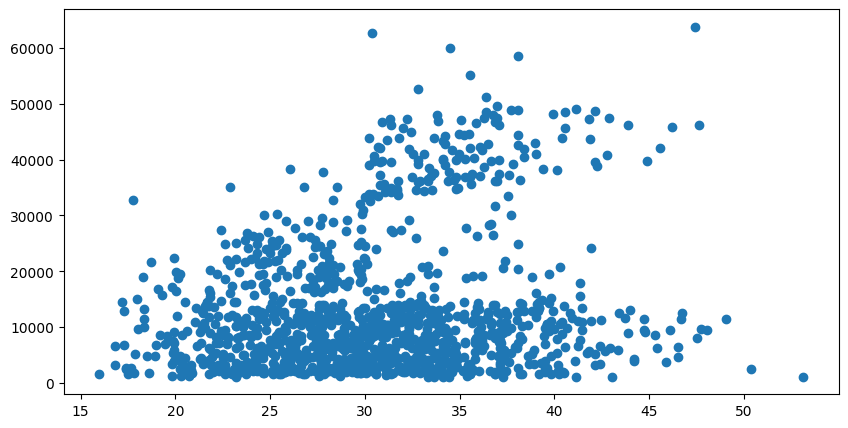

In [232]:
plt.figure(figsize = (10,5))
plt.scatter(df["bmi"],df["charges"])
plt.show()

# Task #3 - Prepare the data for a model fitting

In [233]:
df_new = pd.get_dummies(df, prefix = ["region"], columns = ["region"])
df_new = df_new.drop(columns = ["region_southeast"])
df_new

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,19.0,female,27.900,0.0,True,16884.92400,False,False,True
1,18.0,male,33.770,1.0,False,1725.55230,False,False,False
2,28.0,male,33.000,3.0,False,4449.46200,False,False,False
3,33.0,male,22.705,0.0,False,21984.47061,False,True,False
4,32.0,male,28.880,0.0,False,3866.85520,False,True,False
...,...,...,...,...,...,...,...,...,...
1203,50.0,male,30.970,3.0,False,10600.54830,False,True,False
1204,18.0,female,31.920,0.0,False,2205.98080,True,False,False
1205,18.0,female,36.850,0.0,False,1629.83350,False,False,False
1206,21.0,female,25.800,0.0,False,2007.94500,False,False,True


In [234]:
df_new["smoker"] = df_new["smoker"].astype("int64")
df_new["is_male"] = (df_new["smoker"] == "male").astype("int64")

In [235]:
df_new = df_new.drop(columns = ["sex"],axis = 1)

In [236]:
df_new.head()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,False,False,True,0
1,18.0,33.770,1.0,0,1725.55230,False,False,False,0
2,28.0,33.000,3.0,0,4449.46200,False,False,False,0
3,33.0,22.705,0.0,0,21984.47061,False,True,False,0
4,32.0,28.880,0.0,0,3866.85520,False,True,False,0


# Task #4 : Fit a linear regression model to our data

In [237]:
df_new = df_new.dropna()

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [239]:
#Define input and output variables
X = df_new.drop(columns = ["charges"])
y = df_new["charges"]

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)

#Create and train Linear regression model 
model = LinearRegression()
model.fit(X_train,y_train)

# Make prediction on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared eroor
r2_score = r2_score(y_test,y_pred)

# Output the mean squared erri
r2_score

0.7051286147918414

In [240]:
#also can use this method to calculate 
# Calculate the mean squared eroor
#mse = mean_squared_error(y_test,y_pred)

# Output the mean squared erri
#mse
#df_new

### Implement model cration and training here
### Use as many celss as you need

In [241]:
val_df = pd.read_csv("validation_dataset.csv")
val_df.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


# Task #5 see how model performs on validation

In [242]:
# Preprocessing validation dataset using function
def preprocess_df(df):
    df["region"].str.lower()
    df_new = pd.get_dummies(df, prefix = ["region"], columns = ["region"])
    
    df_new["smoker"] = (df_new["smoker"]=="yes")
    df_new = df_new.drop(columns = ["region_southeast"])
    df_new["smoker"] = df_new["smoker"].astype("int64")
    df_new["is_male"] = (df_new["smoker"] == "male").astype("int64")
    df_new = df_new.drop(columns = ["sex"])

    return df_new
    

In [243]:
# make validation ready
input_df = preprocess_df(val_df)
input_df.head(3)

,age,bmi,children,smoker,region_northeast,region_northwest,region_southwest,is_male
0,18.0,24.09,1.0,0,False,False,False,0
1,39.0,26.41,0.0,1,True,False,False,0
2,27.0,29.15,0.0,1,False,False,False,0


In [244]:
df_new.head(3)

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.90,0.0,1,16884.9240,False,False,True,0
1,18.0,33.77,1.0,0,1725.5523,False,False,False,0
2,28.0,33.00,3.0,0,4449.4620,False,False,False,0


In [245]:
predictions = model.predict(input_df)
predictions

array([ 2.14331105e+02,  3.10959181e+04,  2.79429933e+04,  5.72700686e+04,
        6.85755733e+03,  5.84281095e+04,  6.87885828e+03,  1.29030038e+04,
        1.24999005e+04,  1.63115863e+04,  2.70679877e+03,  1.42611898e+04,
        1.12437882e+04,  1.19557209e+04,  2.53831151e+03,  3.89559329e+03,
        4.26474152e+04,  6.40876310e+04,  5.91554827e+04,  1.13691181e+04,
        1.16979222e+02,  1.27412657e+04,  3.22792755e+04,  1.20130160e+04,
        9.91162773e+03,  4.93340099e+03,  5.88388412e+04,  3.20447104e+03,
        1.17347371e+04,  1.07479350e+04,  6.03588059e+03,  2.70283609e+04,
        3.09622649e+04,  1.32918214e+04,  3.24908028e+04,  1.40770218e+04,
        5.92196585e+04,  1.46436823e+04, -5.30865278e+01,  2.99176471e+04,
        3.03464750e+04,  1.18832385e+04,  3.91576709e+03,  6.06367192e+04,
        5.79554267e+03,  4.04053747e+04,  6.83679941e+04,  3.07361717e+04,
        1.52434415e+04,  3.53443461e+04])

In [246]:
predictions_new = [x if x>0 else 1000 for x in predictions]

In [247]:
validation_data = val_df.copy()

In [248]:
validation_data["predicted_charges"] = predictions_new

In [270]:
validation_data

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,214.331105
1,39.0,male,26.410000,0.0,yes,northeast,31095.918088
2,27.0,male,29.150000,0.0,yes,southeast,27942.993286
3,71.0,male,65.502135,13.0,yes,southeast,57270.068595
4,28.0,male,38.060000,0.0,no,southeast,6857.557331
5,70.0,female,72.958351,11.0,yes,southeast,58428.109495
6,29.0,female,32.110000,2.0,no,northwest,6878.858279
7,42.0,female,41.325000,1.0,no,northeast,12903.003795
8,48.0,female,36.575000,0.0,no,northwest,12499.900531
9,63.0,male,33.660000,3.0,no,southeast,16311.586267


In [274]:
def highlight_status_column(s):
    # s adalah Series (kolom) yang dilewatkan ke fungsi
    # Mengembalikan array string CSS dengan panjang yang sama
    return ['background-color: yellow' for v in s]

In [278]:
styled_df_solid = validation_data.style.apply(highlight_status_column, subset=['predicted_charges'], axis=0)
styled_df_solid

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.000000,female,24.090000,1.000000,no,southeast,214.331105
1,39.000000,male,26.410000,0.000000,yes,northeast,31095.918088
2,27.000000,male,29.150000,0.000000,yes,southeast,27942.993286
3,71.000000,male,65.502135,13.000000,yes,southeast,57270.068595
4,28.000000,male,38.060000,0.000000,no,southeast,6857.557331
5,70.000000,female,72.958351,11.000000,yes,southeast,58428.109495
6,29.000000,female,32.110000,2.000000,no,northwest,6878.858279
7,42.000000,female,41.325000,1.000000,no,northeast,12903.003795
8,48.000000,female,36.575000,0.000000,no,northwest,12499.900531
9,63.000000,male,33.660000,3.000000,no,southeast,16311.586267
